<a href="https://colab.research.google.com/github/GTLibraryDataVisualization/Introduction-to-Text-Analytics-with-Python/blob/master/Final_Text_Analytics_with_Python_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This workshop we will be using the NLTK library to walk you through some basic steps of a text analytics project. NLTK is a library used to work with human language data.

"Text analytics is the automated process of translating large volumes of unstructured text into quantitative data to uncover insights, trends, and patterns. Combined with data visualization tools, this technique enables companies to understand the story behind the numbers and make better decisions." -monkeylearn.com

Some basic steps of text analysis we are going to demonstrate include:

       -tokenize text
       -clean punctuations 
       -remove stop words 
       -stem and lemmatize words 
       -tag words 
       -vocabulary diversity
       -word frequency distribution

In [1]:
# Imports

import os #provides functions for interacting with operating systems
import glob #used to return all file paths that match a specific pattern

# import sys #provides functions and variables used to manipulate different part of the Python runtime environment

### Import files

Make sure to import sample_data into Google Colab in files.

In order to import a folder of files, we use the os.chdir function to first navigate to the right directory.

Then we use glob.glob function to iterate through all files.

In [2]:
my_dir = "sample_data"
os.chdir(my_dir)   # change the current working directory to specified path. 

In [3]:
os.getcwd() # verify that we are in the right directory

'/content/sample_data'

In [ ]:
reviewList=[]
# code through here
for file in glob.glob("*.txt"):   # glob.glob returns a list of pathnames. It helps us loop through all files with a .txt extension 
    with open(file, "r") as f:
        content = f.readlines()
        for line in content:
            reviewList.append(line) # add all the data (or in this case the strings in the files in sample data) to this list
reviewList # see the list of Strings

We want a bag of words, so we convert the review list into a huge string.

In [ ]:
str1 = " " # String that will combine all the strings in the reviewList into one huge string
data = str1.join(reviewList)

data = data.replace("<br />","") # deletes any breaks...
# data = data.replace("\n", "") # and \n (newline characters)
data = data.replace("."," ") # Remove sentence structure by removing periods
data = data.replace("'", " ") # split contractions so that stopwords ('ll, 'd, 've, etc) can be removed later

data = data.lower() # Normalize any capitalization

sorted(data) # print preview

### Remove punctuation and stop words
Tokenization is the process by which big quantity of text is divided into smaller parts called tokens.

Stop words are words that are so commonly used that they carry very little useful information.

We will be using the NLTK to help us.
http://www.nltk.org/nltk_data/

In [6]:
import nltk
# nltk.download_shell() for mac users

nltk.download("punkt")

from nltk.corpus import stopwords 
from string import punctuation
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokens = word_tokenize(data) # converts string into a list of tokens (words)
words = [word for word in tokens if not word in punctuation]
sorted(words)

In [11]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Add extra stop words after viewing the results
stop_words.add("''")
stop_words.add("``")
stop_words.add("--")
# stop_words.remove("yourself")
print(sorted(stop_words))


["''", '--', '``', 'a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
filtered_words = [word for word in words if word not in stop_words]
print(sorted(filtered_words))

['1/2', '10', '10', '10', '100th', '12', '15', '1940s', '1970', '1982', '1million', '1st', '1st', '2', '2', '2/3', '20', '20', '2003', '22', '22', '24', '25', '4', '4', '40s', '5', '5m', '6', '6', '60s', '7', '70mm', '77', '77', 'abilities', 'ability', 'able', 'able', 'abyss', 'accident', 'acclaimed', 'achieve', 'act', 'acting', 'acting', 'acting', 'action', 'action', 'action', 'actor', 'actor', 'actor', 'actor', 'actor', 'actors', 'actual', 'actually', 'actually', 'adapts', 'admit', 'advance', 'aerial', 'aftermath', 'aftertaste', 'afterward', 'aged', 'aging', 'agree', 'air', 'airstation', 'alas', 'alaska', 'albert', 'allowed', 'almost', 'almost', 'almost', 'along', 'alongside', 'already', 'also', 'also', 'also', 'although', 'always', 'always', 'always', 'always', 'always', 'amaze', 'amazing', 'amazingly', 'andrews', 'andrews', 'andrews', 'andrews', 'andrews', 'another', 'another', 'another', 'another', 'another', 'anti-climactic', 'anymore', 'anyone', 'anyone', 'anyone', 'anything', '

### Stemming and Lemmatization

To reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [15]:
from nltk.stem import PorterStemmer 
#process for removing the commoner morphological and inflexional endings from words in English, liked,likes->like
from nltk.stem import SnowballStemmer
#improved PorterStemmmer

stemmer = PorterStemmer()
stemmer2 = SnowballStemmer("english") #tell SnowballStemmer the language is English

stem_words = [stemmer2.stem(word) for word in filtered_words]
print(sorted(stem_words))

['1/2', '10', '10', '10', '100th', '12', '15', '1940s', '1970', '1982', '1million', '1st', '1st', '2', '2', '2/3', '20', '20', '2003', '22', '22', '24', '25', '4', '4', '40s', '5', '5m', '6', '6', '60s', '7', '70mm', '77', '77', 'abil', 'abil', 'abl', 'abl', 'abyss', 'accid', 'acclaim', 'achiev', 'act', 'act', 'act', 'act', 'action', 'action', 'action', 'actor', 'actor', 'actor', 'actor', 'actor', 'actor', 'actual', 'actual', 'actual', 'adapt', 'admit', 'advanc', 'aerial', 'aftermath', 'aftertast', 'afterward', 'age', 'age', 'agre', 'air', 'airstat', 'ala', 'alaska', 'albert', 'allow', 'almost', 'almost', 'almost', 'along', 'alongsid', 'alreadi', 'also', 'also', 'also', 'although', 'alway', 'alway', 'alway', 'alway', 'alway', 'amaz', 'amaz', 'amaz', 'andrew', 'andrew', 'andrew', 'andrew', 'andrew', 'anoth', 'anoth', 'anoth', 'anoth', 'anoth', 'anti-climact', 'anymor', 'anyon', 'anyon', 'anyon', 'anyth', 'anyth', 'anyth', 'apart', 'appar', 'appear', 'appear', 'appear', 'applaus', 'appla

In [24]:
nltk.download('wordnet') #lexical database for English (nouns, adjectives, adverbs, verbs)

#WordNet is a large lexical database of English. Nouns, verbs, adjectives and adverbs 
#are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. 

from nltk.stem import WordNetLemmatizer 
#the process of grouping together the different inflected forms of a word so they can be analyzed as a single item
wnl = WordNetLemmatizer()
print(wnl.lemmatize("cats"))
print(wnl.lemmatize("giggling"))
print(wnl.lemmatize("giggling", "v"))

lemm_words = [wnl.lemmatize(word) for word in filtered_words]
sorted(lemm_words)
#some words are not correctly lemmatized without tagging: allowed, "gave", "killed", "knew"

cat
giggling
giggle


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Speech Tagging
Words in a sentence can be categorized by their syntatic function, known as the part of speech (POS). Take a look at the table below to see some examples of POS tags. We can use the tag to help our lemmatizer to return a word to its original form.

Tag| Definition | Example
--- | --- | ---
CC | coordinating conjunction | and, but, for, etc
CD | cardinal digit | 0, 10, 523
DT | determiner | that, which
EX | existential there | "there is" ... think of it like "there exists"
FW | foreign word | 
IN | preposition/subordinating conjunction | above, toward, on, etc
JJ | adjective | big 
JJR | adjective, comparative |bigger
JJS | adjective, superlative | biggest
LS | list marker | 1)
MD | modal | could, will
NN | noun, singular | desk
NNS | noun plural | desks
NNP | proper noun, singular | Harrison
NNPS | proper noun, plural | Americans
PDT | predeterminer | all the kids
POS | possessive ending | parent's
PRP | personal pronoun | I, he, she
PRP$ |  possessive pronoun | my, his, hers
RB | adverb | very, silently
RBR |  adverb, comparative | better
UH | interjection | errrrrrrrm
VB | verb, base form | take
VBD | verb, past tense | took
VBG | verb, gerund/present participle | taking
VBN | verb, past participle | taken
VBP | verb, present tense non-3rd person singular | take
VBZ | verb, present tense 3rd person singular | takes
WDT | wh-determiner | which
WP | wh-pronoun | who, what
WP\$ | possessive wh-pronoun | whose
WRB | wh-abverb | where, when
RBS  | adverb, superlative | best
RP  | particle | give up
TO  | infinitive marker| go 'to' the store


#### 1. Tagging our data

nltk.pos_tag() returns a tuple with the POS tag. The key here is to map NLTK’s POS tags to the format wordnet lemmatizer would accept. The get_wordnet_pos() function defined below does this mapping job.

Reference: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

In [13]:
nltk.download("omw-1.4") #multilingual wordnet
nltk.download("averaged_perceptron_tagger")

text = word_tokenize("faking a review for tagging purpose")
nltk.pos_tag(text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('faking', 'VBG'),
 ('a', 'DT'),
 ('review', 'NN'),
 ('for', 'IN'),
 ('tagging', 'VBG'),
 ('purpose', 'NN')]

In [25]:
from collections import Counter
#count hashable objects

tags = nltk.pos_tag(filtered_words)
print (tags[:5])

tag_counts = Counter(tag for word,tag in tags) #syntax can be confusing. This means for each (word, tag) tuple, take the tag
print (tag_counts)


[('tough', 'JJ'), ('sell', 'NN'), ('british', 'JJ'), ('playwright', 'NN'), ('ronald', 'NN')]
Counter({'NN': 708, 'JJ': 378, 'RB': 212, 'NNS': 202, 'VBD': 103, 'VBP': 102, 'VBG': 76, 'CD': 72, 'VBZ': 66, 'VBN': 62, 'VB': 59, 'IN': 43, 'MD': 29, 'JJR': 10, 'JJS': 8, 'DT': 7, 'RBR': 6, 'PRP': 5, 'RP': 4, 'FW': 3, 'NNP': 2, 'WP$': 1, 'CC': 1, 'UH': 1, 'PRP$': 1, 'RBS': 1, 'WDT': 1})


#### 2. Use tags for lemmatization

pos_tag gets the tag for the word, it comes in form of a list of tuples[(word1, tag1)(word2, tag2)(word3, tag3)].

In [36]:
#tuples are collections of objects in order
from nltk.corpus import wordnet  

#We are tagging each word so we can lemmatize it to common base form
def get_wordnet_pos(tokens: list) -> list:
    tag_dict = {
                "J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV
                }
    tags = nltk.pos_tag(tokens)

    return [(word, tag_dict.get(tag[0], wordnet.NOUN)) for word, tag in tags]  
    # Use in get function (tag[0], wordnet.NOUN) so all words outside of the four categories will be tagged as noun.
    # Here python gets a word, tag pair out of the tagging. 
    # For tags, it only focuses on the four categories tag_dict includes.
 
pos_str = "The quick brown fox jumped over the lazy dog"
pos_tokens = word_tokenize(pos_str)
print(get_wordnet_pos(pos_tokens))


[('The', 'n'), ('quick', 'a'), ('brown', 'n'), ('fox', 'n'), ('jumped', 'v'), ('over', 'n'), ('the', 'n'), ('lazy', 'a'), ('dog', 'n')]


In [41]:
# tag our data and then lemmatize them.
pos_tag_words = get_wordnet_pos(filtered_words)
print(pos_tag_words)

[('tough', 'a'), ('sell', 'n'), ('british', 'a'), ('playwright', 'n'), ('ronald', 'n'), ('harwood', 'n'), ('adapts', 'n'), ('autobiographical', 'a'), ('stage', 'n'), ('drama', 'n'), ('loud', 'a'), ('bellowing', 'n'), ('film', 'n'), ('wwii', 'a'), ('shakespearean', 'a'), ('theatrical', 'a'), ('troupe', 'n'), ('saddled', 'v'), ('aged', 'a'), ('blustery', 'n'), ('brilliant-but-unreliable', 'a'), ('star', 'a'), ('end', 'n'), ('tether', 'n'), ('actor', 'n'), ('effete', 'a'), ('assistant', 'n'), ('works', 'v'), ('diligently', 'r'), ('get', 'v'), ('master', 'n'), ('coiffed', 'n'), ('costumed', 'v'), ('production', 'n'), ('king', 'n'), ('lear', 'a'), ('air', 'n'), ('raid', 'v'), ('yet', 'r'), ('men', 'n'), ('losing', 'v'), ('grip', 'n'), ('unraveling', 'v'), ('situation', 'n'), ('based', 'v'), ('waning', 'v'), ('years', 'n'), ('actor', 'n'), ('donald', 'n'), ('wolfit', 'n'), ('whose', 'n'), ('dresser', 'n'), ('ronald', 'n'), ('harwood', 'n'), ('acclaimed', 'v'), ('production', 'n'), ('would', 

In [42]:
lemm_words = [wnl.lemmatize(word, tag) for word,tag in pos_tag_words]
print(sorted(lemm_words[:40]))

['actor', 'adapts', 'aged', 'air', 'assistant', 'autobiographical', 'bellowing', 'blustery', 'brilliant-but-unreliable', 'british', 'coiffed', 'costume', 'diligently', 'drama', 'effete', 'end', 'film', 'get', 'harwood', 'king', 'lear', 'loud', 'master', 'men', 'playwright', 'production', 'raid', 'ronald', 'saddle', 'sell', 'shakespearean', 'stage', 'star', 'tether', 'theatrical', 'tough', 'troupe', 'work', 'wwii', 'yet']


### Counting Words
#### 1. Check Vocabulary Diversity
set() creates a distinct collection of the iterable elements (all words here).

In [17]:
distinct_words = len(set(lemm_words))
total_words = len(lemm_words)
vocab_diversity = distinct_words / total_words
print (distinct_words)  # number of distinct words
print (total_words)    # number of total words
print (f"The vocabulary diversity of the reviews is: {vocab_diversity}")

1072
2163
The vocabulary diversity of the reviews is: 0.49560795191863155


#### 2. Count total words and unique words

In [18]:
count = Counter(lemm_words) #syntax can be confusing. This means for each (word, tag) tuple, take the tag
print (count)

Counter({'movie': 69, 'see': 24, 'costner': 23, 'character': 22, 'film': 19, 'like': 18, 'go': 16, 'kutcher': 16, 'one': 15, 'well': 14, 'get': 13, 'never': 13, 'play': 12, 'scene': 12, 'part': 12, 'much': 12, 'rescue': 12, 'would': 11, 'make': 11, 'really': 11, 'coast': 11, 'guard': 11, 'seem': 10, 'give': 10, 'think': 10, 'great': 9, 'could': 9, 'kevin': 9, 'good': 9, 'story': 9, 'day': 9, 'million': 9, 'two': 8, 'know': 8, 'love': 8, 'lili': 8, 'way': 7, 'best': 7, 'role': 7, 'real': 7, 'ashton': 7, 'come': 7, 'say': 7, 'even': 7, 'swimmer': 7, 'look': 7, 'musical': 7, 'end': 6, 'actor': 6, 'work': 6, 'point': 6, 'u': 6, 'first': 6, 'many': 6, 'watch': 6, 'little': 6, 'past': 6, 'time': 6, 'must': 6, 'year': 5, 'fischer': 5, 'randall': 5, 'half': 5, 'try': 5, 'ever': 5, 'officer': 5, 'live': 5, 'gere': 5, 'problem': 5, 'care': 5, 'around': 5, 'happen': 5, 'enough': 5, 'though': 5, 'sea': 5, 'effect': 5, 'definitely': 5, 'use': 5, 'line': 5, 'long': 5, 'uscg': 5, 'show': 5, 'another'

#### 3. NLTK's Frequency Distributions Functions

We can initiate a frequency distribution by inputing our samples (a list of words) into `FreqDist` 

`fdist = FreqDist(samples)   #create a frequency distribution containing the given samples`

Function | Description
--- | ---
`fdist[sample] += 1`	| increment the count for this sample
`fdist['monstrous']`	| count of the number of times a given sample occurred
`fdist.freq('monstrous')`	| frequency of a given sample
`fdist.N()`	| total number of samples
`fdist.most_common(n)`	| the n most common samples and their frequencies
`for sample in fdist:`	| iterate over the samples
`fdist.max()`	| sample with the greatest count
`fdist.tabulate()`	| tabulate the frequency distribution
`fdist.plot()`	| graphical plot of the frequency distribution
`fdist.plot(cumulative=True)`	| cumulative plot of the frequency distribution
`fdist1 \|= fdist2`	| update fdist1 with counts from fdist2
`fdist1 < fdist2`   | test if samples in fdist1 occur less frequently than in fdist2

In [19]:
from nltk import FreqDist #frequency distribution

freq_words=FreqDist(lemm_words) # intialize the freq distribution on our sample of lemmatized words
freq_words.most_common(30)

[('movie', 69),
 ('see', 24),
 ('costner', 23),
 ('character', 22),
 ('film', 19),
 ('like', 18),
 ('go', 16),
 ('kutcher', 16),
 ('one', 15),
 ('well', 14),
 ('get', 13),
 ('never', 13),
 ('play', 12),
 ('scene', 12),
 ('part', 12),
 ('much', 12),
 ('rescue', 12),
 ('would', 11),
 ('make', 11),
 ('really', 11),
 ('coast', 11),
 ('guard', 11),
 ('seem', 10),
 ('give', 10),
 ('think', 10),
 ('great', 9),
 ('could', 9),
 ('kevin', 9),
 ('good', 9),
 ('story', 9)]

In [ ]:
! pip install matplotlib #creating static, animated, and interactive visualizations

You should consider upgrading via the '/Users/souliyachittarath/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


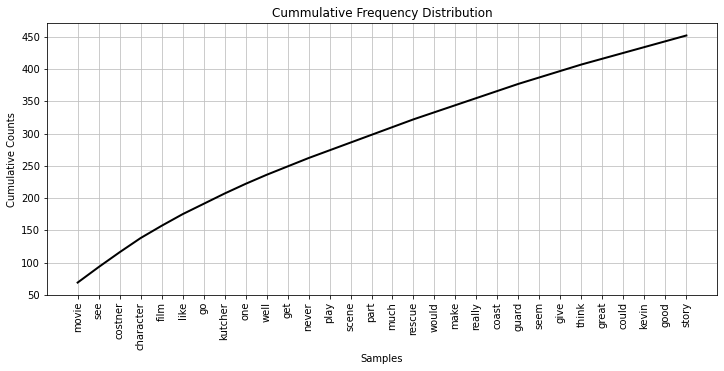

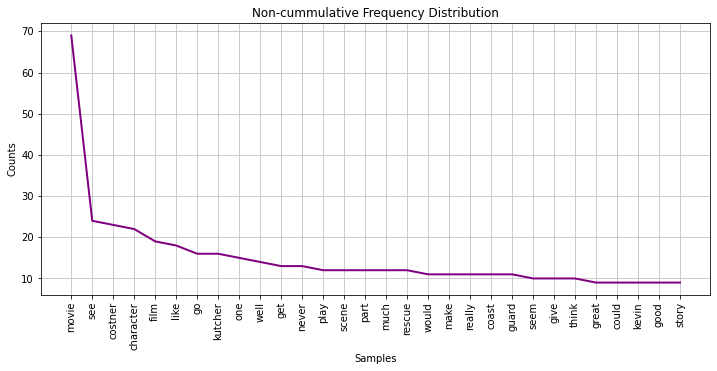

In [20]:
import matplotlib.pyplot as plt #basically matlab

plt.figure(figsize=(12, 5)) 
plt.title("Cummulative Frequency Distribution")
plot1 = FreqDist(lemm_words).plot(30, cumulative=True, color="black") #frequency distribution

plt.figure(figsize=(12, 5))  
plt.title("Non-cummulative Frequency Distribution")
plot2 = FreqDist(lemm_words).plot(30, cumulative=False, color="purple")

### Dispersion Plot

Show the location of words in the collection.

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

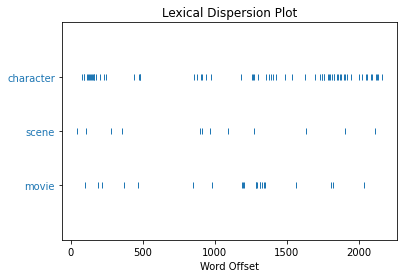

In [ ]:
from nltk.draw.dispersion import dispersion_plot 
#allows for visualization of the lexical dispersion of words in a corpus, which is a collection of texts
dispersion_plot(lemm_words, ['movie', 'scene','character'])

Reference: 

        https://www.nltk.org/book/ch01.html
        https://www.nltk.org/

